In [1]:
import pandas as pd 
from datetime import datetime
import seaborn as sns

In [2]:
train_data=pd.read_excel('/content/sample_data/Data_Train.xlsx')
pd.set_option('display.max_columns', None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##**EDA**
######From description we can seee that Date_of_Journer is a object data type
######Therefore we have to convert thies datatype into timestamp so as to use this column properly for prediction
######For this we require pandas to_datetime to convert object data type to datetime dtype.

In [8]:
train_data['Journey_day']= train_data['Date_of_Journey'].str.split('/').str[0]
train_data['Journey_month']= train_data['Date_of_Journey'].str.split('/').str[1]
train_data['Journey_year']=train_data['Date_of_Journey'].str.split('/').str[2]

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [10]:
#Since we have convert Date_of_journey column into integers Now we can drop as it is of no use.

train_data.drop(['Date_of_Journey'], axis =1, inplace=True)

In [11]:
# Departure time is when a plane leaves the gate .
# Similar to Date_of_Journey we can extract value from Dep_Time.

# Extracting hours.
train_data['Dep_hour']=train_data['Dep_Time'].str.split(':').str[0]

# Extracting Minutes
train_data['Dep_min']=train_data['Dep_Time'].str.split(':').str[1]

In [12]:
# Now we can drop Dep_Time as it is of no use.
train_data.drop(['Dep_Time'], axis=1, inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50


In [13]:
train_data['Arrival_Time']=train_data['Arrival_Time'].str.split(' ').str[0]

In [14]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time.

# Extracting Hours
train_data['Arrival_hour']=train_data['Arrival_Time'].str.split(':').str[0]

# Extracting Minutes
train_data['Arrival_Min'] = train_data['Arrival_Time'].str.split(':').str[1]

In [15]:
# Now we can drop Arrival_Time as it is of no use.
train_data.drop(['Arrival_Time'],axis=1, inplace=True)
train_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35


In [16]:
# Time taken by plane to reach destination is called duration.
# It is the difference between departure Time and Arrival Time.

train_data['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: object

In [17]:
train_data['duration_hour']=train_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
# train_data['duration_mins']=train_data['Duration'].str.split(' ').str[1].str.split('h').str[1]

In [18]:
train_data[train_data['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,03,2019,16,50,16,55,5m


In [19]:
train_data.drop(6474,axis=0,inplace=True)


In [20]:
train_data['duration_hour']=train_data['duration_hour'].astype('int')


In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,04,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35,4


In [22]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,2019,09,25,04,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,2019,18,05,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,2019,16,50,21,35,4


##Handling Categorical Data
#####One can find many ways to handle categorical data. some of them categorical data are
###Nominal data
--->data are not in any order ---> OneHotEncoder is used in this case.
###Ordinal data
---> data are in order---> LabelEncoder is used in this case

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

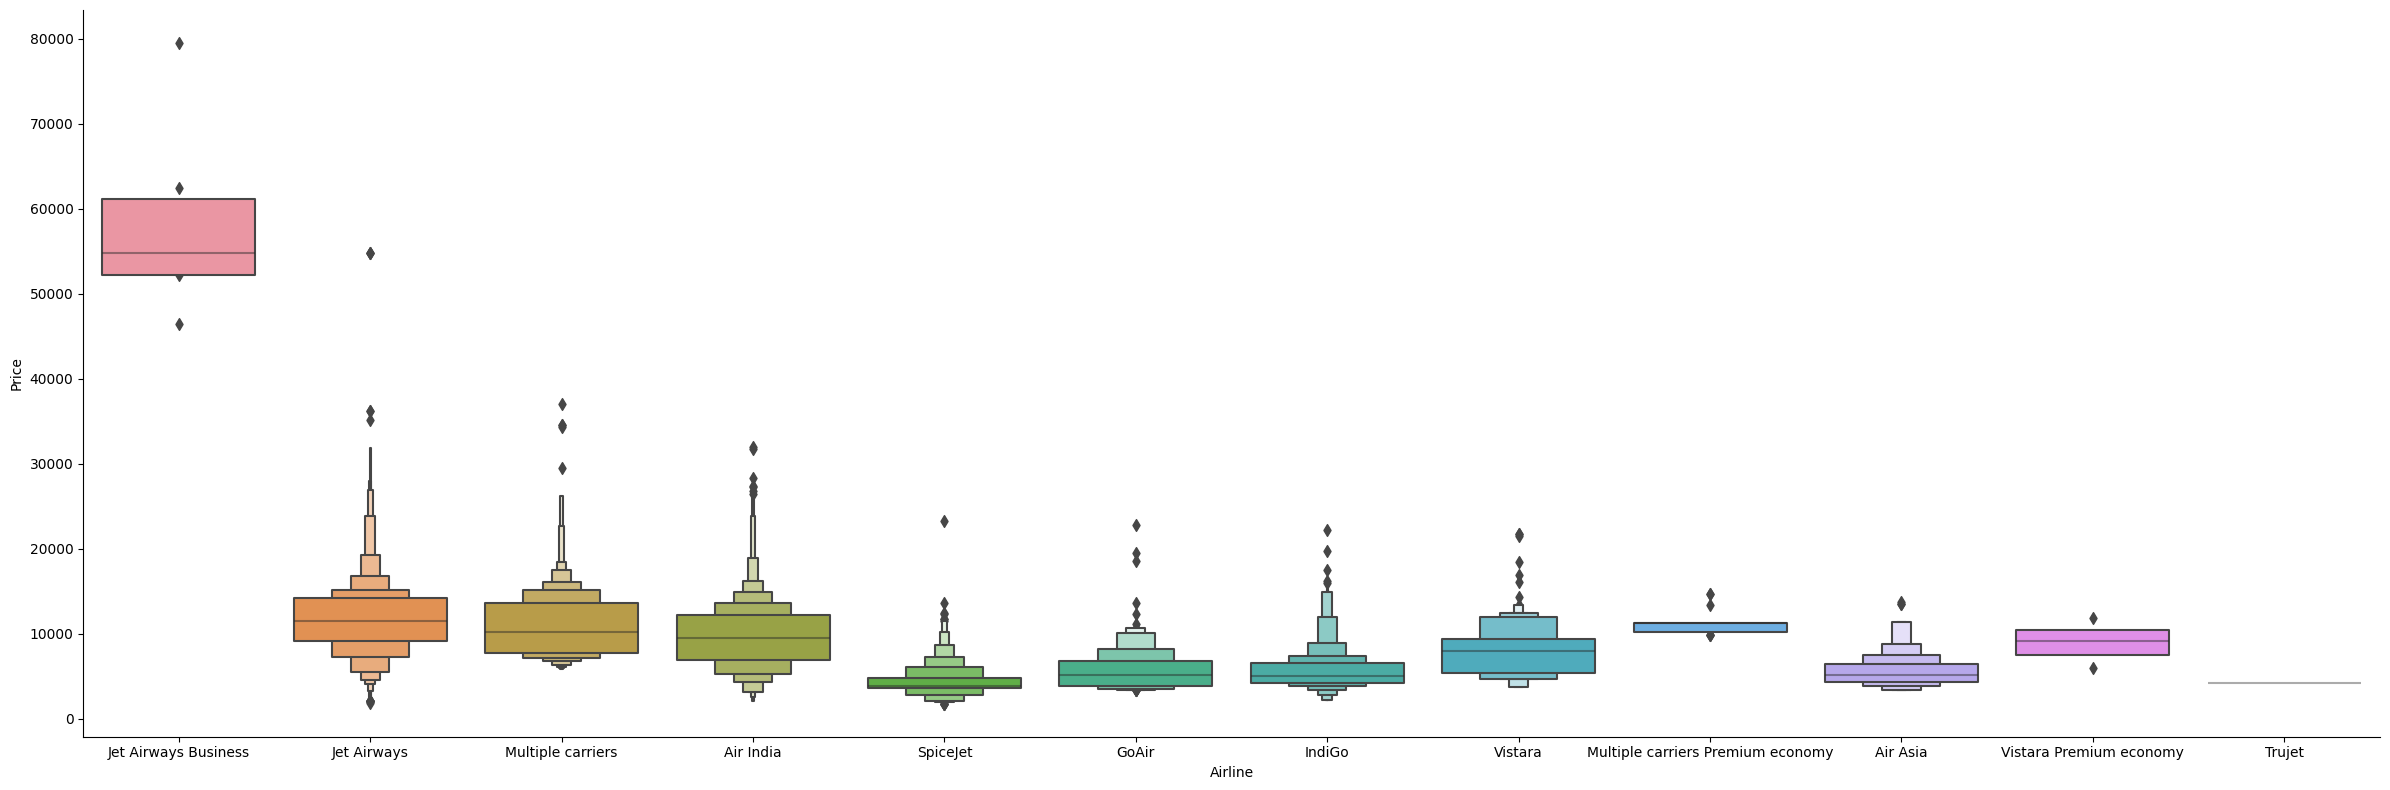

In [25]:
# From graph we can see that Jet Airway Bussiness have the highest Price.
# Apart from the first Airline almost all are having similar median
# airline Vs Price.

sns.catplot(y='Price',x='Airline', data= train_data.sort_values('Price', ascending=False),
            kind='boxen', height=8, aspect=3)


In [26]:
# As Airline is nominal Categorical data we will perform OneHotEncoding
Airline = train_data[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

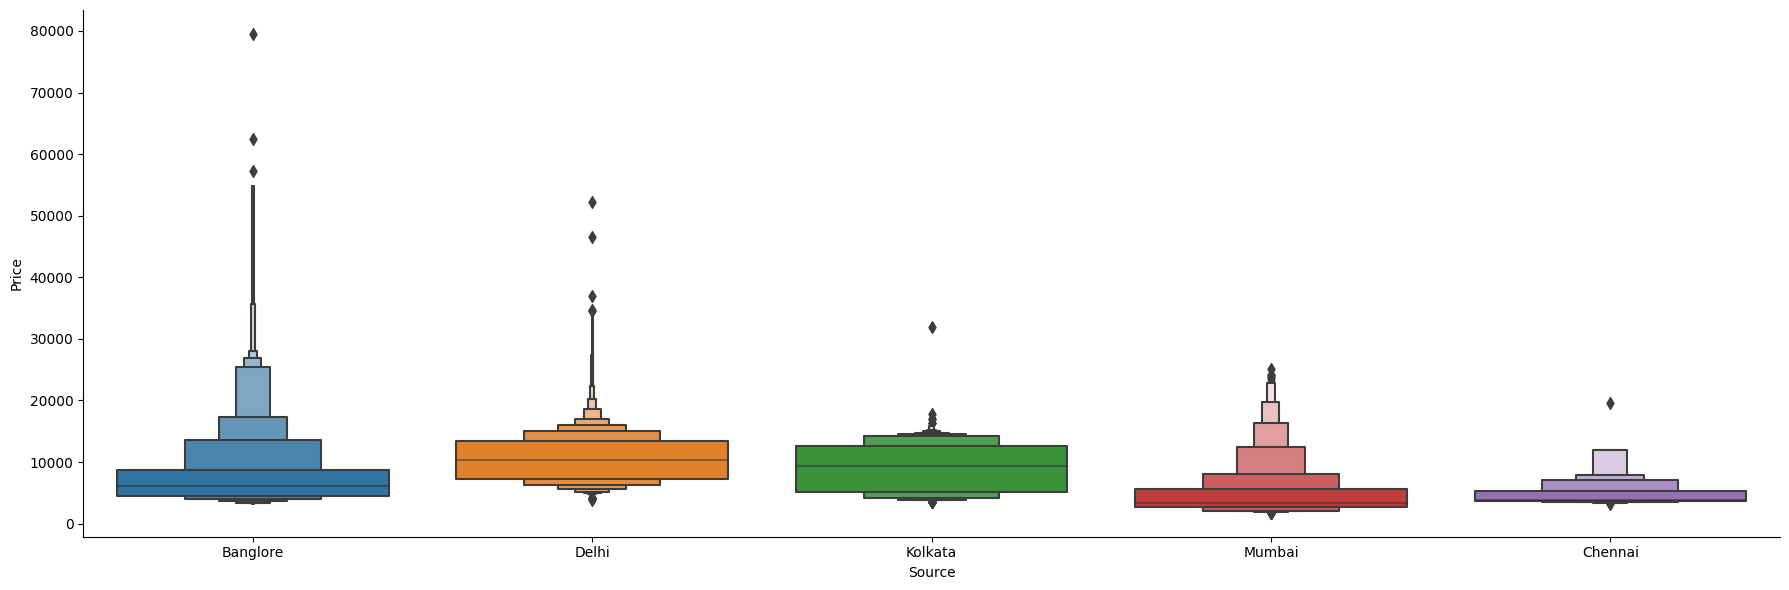

In [28]:
# Source VS Price
sns.catplot(y='Price', x='Source',
            data=train_data.sort_values('Price',ascending = False),
            kind='boxen',height=6, aspect=3)

In [29]:
#  As source is Nominal Categorical data we will perform OnehotEncoding

Source=train_data[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal Categorical data we will perform OnehotEncoding

Destination= train_data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10681, dtype: object

In [33]:
# Additional_info contains almost 80% no_info
# Route and total_stops are related to each other.

train_data.drop(['Route','Additional_Info'], axis=1, inplace=True)
train_data.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,2019,09,25,04,25,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,2019,18,05,23,30,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,2019,16,50,21,35,4


In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder 
# Here values are assigned with corresponding keys

train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2, '3 stops':3,'4 stops':4}, inplace=True )
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,01,10,2
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,13,15,7
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,04,25,19
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,23,30,5
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,21,35,4


In [36]:
# Concatenate Dataframe----> train_data + Airline + Source + Destination

data_train=pd.concat([train_data, Airline, Source, Destination] ,axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,01,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,04,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10681 non-null  object
 1   Source         10681 non-null  object
 2   Destination    10681 non-null  object
 3   Total_Stops    10681 non-null  int64 
 4   Price          10681 non-null  int64 
 5   Journey_day    10681 non-null  object
 6   Journey_month  10681 non-null  object
 7   Journey_year   10681 non-null  object
 8   Dep_hour       10681 non-null  object
 9   Dep_min        10681 non-null  object
 10  Arrival_hour   10681 non-null  object
 11  Arrival_Min    10681 non-null  object
 12  duration_hour  10681 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [38]:
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,2019,22,20,01,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,2019,05,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,2019,09,25,04,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,2019,18,05,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,2019,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
data_train.shape

(10681, 30)

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
test_data=pd.read_excel('/content/sample_data/Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
test_data.shape

(2671, 10)

In [43]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [46]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [47]:
test_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [48]:
test_data['Journey_day']=test_data['Date_of_Journey'].str.split('/').str[0]
test_data['Journey_months']=test_data['Date_of_Journey'].str.split('/').str[1]
test_data['Journey_year']=test_data['Date_of_Journey'].str.split('/').str[2]

In [49]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_months,Journey_year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [50]:
# Since we have convert Date_of_Journey column into integers
# Now we can drop as it is of no use.
test_data.drop(['Date_of_Journey'], axis=1,inplace=True)

In [51]:
# Departure time is when a plane leaves the gate .
# Similar to Date_of_Journey we can extract value from Dep_Time.

# Extracting hours.
test_data['Dep_hour']=test_data['Dep_Time'].str.split(':').str[0]

# Extracting Minutes
test_data['Dep_min']=test_data['Dep_Time'].str.split(':').str[1]

In [52]:
# Now we can drop Dep_Time as it is of no use.
test_data.drop(['Dep_Time'], axis=1, inplace= True)
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,05,2019,06,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,05,2019,08,00
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,23,55


In [53]:
test_data['Arrival_Time']=test_data['Arrival_Time'].str.split(' ').str[0]

In [55]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time.

# Extracting Hours
test_data['Arrival_hour']=test_data['Arrival_Time'].str.split(':').str[0]

# Extracting Minutes
test_data['Arrival_Min'] = test_data['Arrival_Time'].str.split(':').str[1]

In [56]:
# Now we can drop Arrival_Time as it is of no use.
test_data.drop(['Arrival_Time'],axis=1, inplace=True)
test_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,06,2019,17,30,04,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,05,2019,06,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15,19,00
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,05,2019,08,00,21,00
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,06,2019,23,55,02,45


In [57]:
# Time taken by plane to reach destination is called duration.
# It is the difference between departure Time and Arrival Time.

test_data['Duration'].str.split(' ').str[0].str.split('h').str[0]

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 2671, dtype: object

In [59]:
test_data['duration_hour']=test_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
# train_data['duration_mins']=train_data['Duration'].str.split(' ').str[1].str.split('h').str[1]

In [60]:
test_data[test_data['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,12,03,2019,16,50,16,55,5m


In [61]:

test_data.drop(2660,axis=0,inplace=True)

In [62]:
test_data['duration_hour']=test_data['duration_hour'].astype('int')


In [63]:
test_data.drop(['Duration'], axis=1, inplace=True)

In [64]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,06,2019,17,30,04,25,10
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,05,2019,06,20,10,20,4
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,05,2019,19,15,19,00,23
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,05,2019,08,00,21,00,13
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,06,2019,23,55,02,45,2


In [65]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            439
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [66]:
Airline= test_data[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [67]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       185
Chennai       75
Name: Source, dtype: int64

In [68]:
Source=test_data[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [69]:
Destination = test_data[['Destination']]
Destination=pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [70]:
test_data['Route']

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2670, dtype: object

In [71]:
# Additional_info contains almost 80% no_info
# Route and Total_stops are related to each other

test_data.drop(['Route', 'Additional_Info'], axis=1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,Jet Airways,Delhi,Cochin,1 stop,6,06,2019,17,30,04,25,10
1,IndiGo,Kolkata,Banglore,1 stop,12,05,2019,06,20,10,20,4
2,Jet Airways,Delhi,Cochin,1 stop,21,05,2019,19,15,19,00,23
3,Multiple carriers,Delhi,Cochin,1 stop,21,05,2019,08,00,21,00,13
4,Air Asia,Banglore,Delhi,non-stop,24,06,2019,23,55,02,45,2


In [72]:
test_data['Total_Stops'].value_counts()


1 stop      1431
non-stop     849
2 stops      378
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [73]:
# As this is case of ordinal Categerical type we perform labelEncoder
# Here values are assigned with corresponding keys

test_data.replace({'non-stop':0 , '1 stop': 1 , '2 stops':2 , '3 stops': 3, '4 stops': 4}, inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour
0,Jet Airways,Delhi,Cochin,1,6,06,2019,17,30,04,25,10
1,IndiGo,Kolkata,Banglore,1,12,05,2019,06,20,10,20,4
2,Jet Airways,Delhi,Cochin,1,21,05,2019,19,15,19,00,23
3,Multiple carriers,Delhi,Cochin,1,21,05,2019,08,00,21,00,13
4,Air Asia,Banglore,Delhi,0,24,06,2019,23,55,02,45,2


In [74]:
# Concatenate dataframe ----> test_data + Airline + Source + Destination
data_test=pd.concat([test_data, Airline, Source, Destination], axis=1)
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,06,2019,17,30,04,25,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,05,2019,06,20,10,20,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,05,2019,19,15,19,00,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,05,2019,08,00,21,00,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,06,2019,23,55,02,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [75]:
data_test.drop(['Airline','Source', 'Destination'], axis=1, inplace=True)
data_test.head()

,Total_Stops,Journey_day,Journey_months,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,2019,17,30,04,25,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,05,2019,06,20,10,20,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,05,2019,19,15,19,00,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,05,2019,08,00,21,00,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,06,2019,23,55,02,45,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
data_test.shape

(2670, 28)

###**Feature Selection**
##### Find out the best feature which will contribute and have good relation with target variable 
##### Following are some of the feature selection methods. 
#####    *Heatmap
#####    *Feature_importance

In [77]:
data_train.shape

(10681, 30)

In [78]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_Min', 'duration_hour',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [79]:
X= data_train.loc[:,[ 'Total_Stops',  'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_Min', 'duration_hour',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_Min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,03,2019,22,20,01,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,05,2019,05,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,06,2019,09,25,04,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,05,2019,18,05,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,01,03,2019,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
Y= data_train.iloc[:, 1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<ipython-input-81-3e7b2e353b51>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')


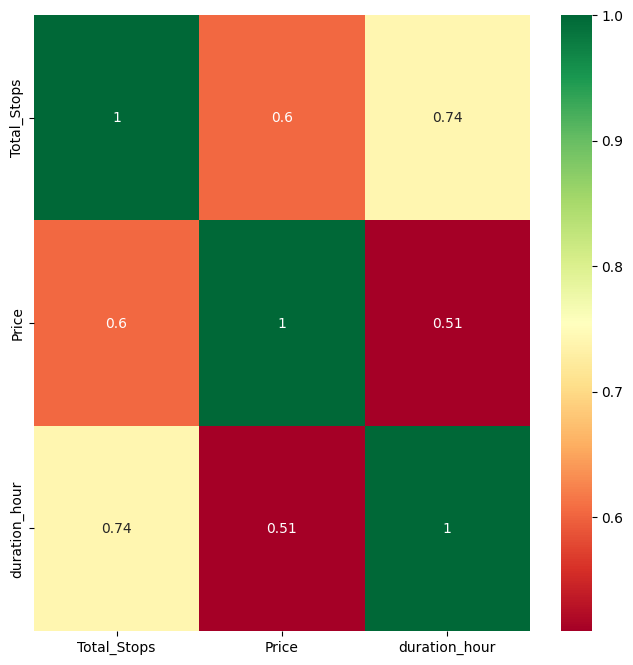

In [81]:
# Find Correlation between Independent and dependent and dependent attributes
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [82]:
# Import Feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
Selection = ExtraTreesRegressor()
Selection.fit(X,Y)

ExtraTreesRegressor()

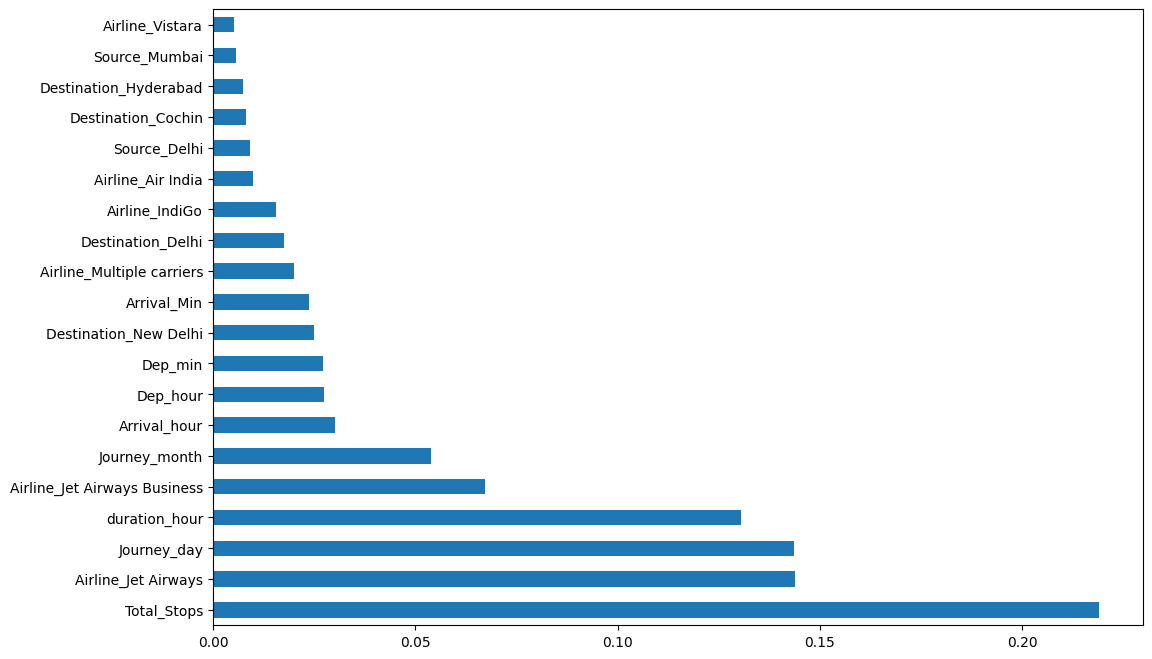

In [86]:
# Plot graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(Selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###Fitting midel using Random Forest
Split dataset into train and est set in order to prediction w.r.t X_test

If meeded do scaling of data 
     * Scaling is not done in Random forest 
     
     Import Model 
     Fit the data 
     Predict w.r.t
     In regression check RSME Score 
     Plot graph


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [89]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,Y_train)
y_pred=reg_rf.predict(X_test)
reg_rf.score(X_train,Y_train)


0.9537905738398593

In [90]:
reg_rf.score(X_test,Y_test)

0.7998424767507804

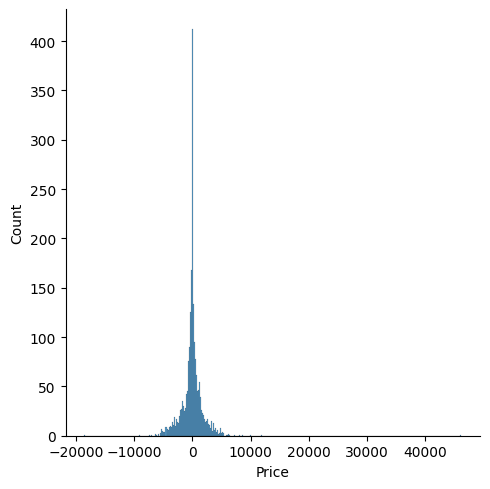

In [92]:
sns.displot(Y_test-y_pred)
plt.show()

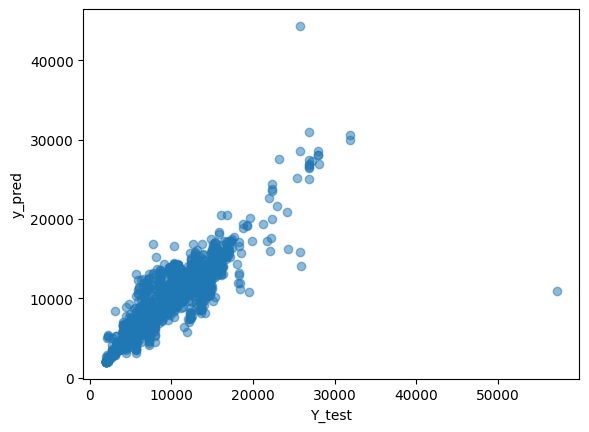

In [93]:
plt.scatter(Y_test, y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.show()

In [97]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE : ', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('r2_score : ',metrics.r2_score(Y_test,y_pred))

MAE :  1140.0656543381879
MSE :  4225677.791269358
RMSE :  2055.6453466659464
r2_score :  0.7998424767507804


###Hyperparameter Tuning

Choose following method for hyperparameter tuning
  1. RandomizedSearchCV--> Fast
  2. GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best parameters and best score.  

In [98]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized SearchCV
# Number of trees in random forest
n_estimators = [ int(x) for x in np.linspace(start=100, stop= 1200, num=12)]

In [101]:
# Number of feature to consider at every split 
max_features= ['auto','sqrt']

# Maximum number of level of levels in tree
max_depth= [ int(x) for x in np.linspace(5,30, num=6)]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 5, 10]

# Minimum number of samples required to each split a node
min_samples_split=[2,5,10,15,100]

In [102]:
# Create the random grid.
random_grid= { 'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [103]:
# Random Search of parameters using 5 fold cross validation.
# Search across 100 different combinations.
rf_random= RandomizedSearchCV( estimator = reg_rf, param_distributions=random_grid,
                              scoring='neg_mean_squared_error', n_iter= 10,
                              cv=5, verbose=2, random_state=42, n_jobs=1)

In [104]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  19.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [106]:
prediction = rf_random.predict(X_test)

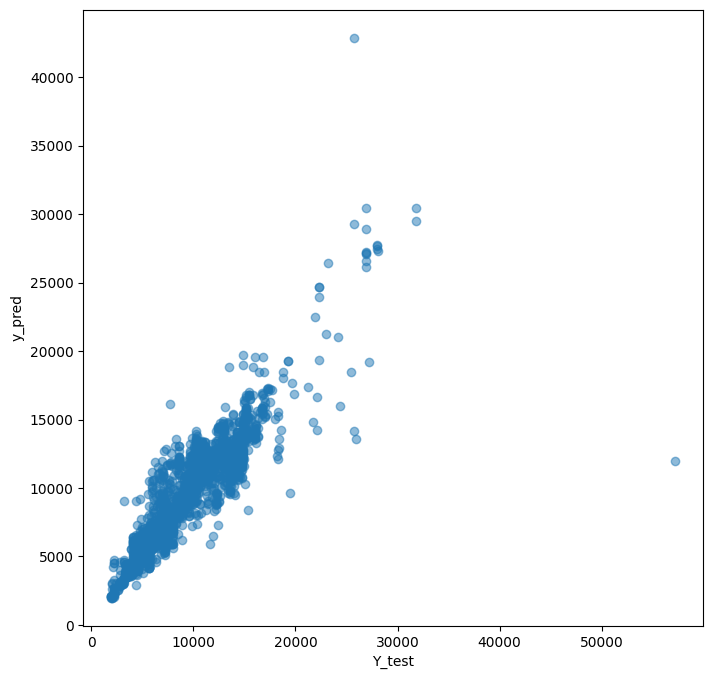

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test, prediction, alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.show()

In [109]:
print('MAE : ', metrics.mean_absolute_error(Y_test,prediction))
print('MSE : ', metrics.mean_squared_error(Y_test, prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE :  1122.9030638980312
MSE :  3796590.763638691
RMSE :  1948.484222065627
